## EDA LAB

The General Social Survey (GSS) is a bi-annual nationally representative survey of Americans, with almost 7000 different questions asked since the survey began in the 1970s. It has straightforward questions about respondents' demographic information, but also questions like "Does your job regularly require you to perform repetitive or forceful hand movements or involve awkward postures?" or "How often do the demands of your job interfere with your family life?" There are a variety of controversial questions. No matter what you're curious about, there's something interesting in here to check out. The codebook is 904 pages (use CTRL+F to search it).

The data and codebook are available at:
https://gss.norc.org/us/en/gss/get-the-data.html

The datasets are so large that it might make sense to pick the variables you want, and then download just those variables from:
https://gssdataexplorer.norc.org/variables/vfilter

Here is your task:
1. Download a small (5-15) set of variables of interest.
2. Write a short description of the data you chose, and why. (1 page)
3. Load the data using Pandas. Clean them up for EDA. Do this in a notebook with comments or markdown chunks explaining your choices.
4. Produce some numeric summaries and visualizations. (1-3 pages)
5. Describe your findings in 1-2 pages.
6. If you have other content that you think absolutely must be included, you can include it in an appendix of any length.

For example, you might want to look at how aspects of a person's childhood family are correlated or not with their career or family choices as an adult. Or how political or religious affiliations correlate with drug use or sexual practices. It's an extremely wide-ranging survey.

Feel free to work with other people in groups, and ask questions!

# Importing and Cleaning Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:/Users/alexl/OneDrive/Desktop/Coursework/Machine Learning/GSS Project/batch_0/result/GSS.csv')

In [3]:
print(df.shape, '\n')
print(df.dtypes, '\n')
print(df.columns, '\n')

(72390, 15) 

year         int64
id_          int64
age         object
educ        object
sex         object
race        object
rincome     object
partyid     object
relig       object
abdefect    object
abrape      object
abany       object
posslqy     object
sexornt     object
ballot      object
dtype: object 

Index(['year', 'id_', 'age', 'educ', 'sex', 'race', 'rincome', 'partyid',
       'relig', 'abdefect', 'abrape', 'abany', 'posslqy', 'sexornt', 'ballot'],
      dtype='object') 



Before coercion: 
 count     72390
unique       75
top          30
freq       1571
Name: age, dtype: object 



<Axes: >

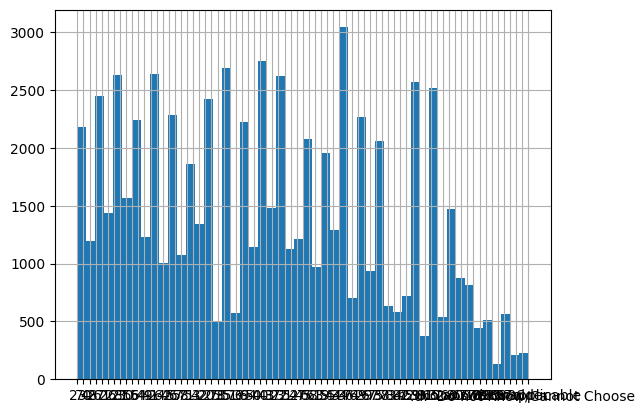

In [4]:
var = 'age' 
print('Before coercion: \n', df['age'].describe(), '\n')
df['age'].hist(bins=50)

After Coercion: 
 count    71212.000000
mean        46.312209
std         17.353604
min         18.000000
25%         32.000000
50%         44.000000
75%         60.000000
max         88.000000
Name: age, dtype: float64 

Total Missings: 
 1178 



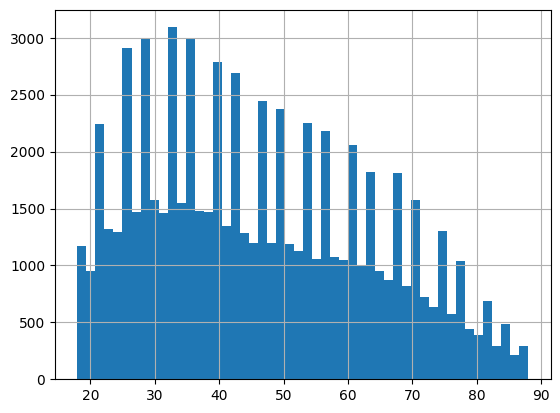

In [5]:
df['age'] = pd.to_numeric(df['age'], errors='coerce')
df['age_nan'] = df['age'].isnull()

print('After Coercion: \n', df['age'].describe(), '\n')
df['age'].hist(bins=50)
print('Total Missings: \n', sum(df['age_nan']), '\n')

In [6]:
print(df['sex'].describe(), '\n')
print(df['sex'].unique(), '\n')

count      72390
unique         6
top       FEMALE
freq       40301
Name: sex, dtype: object 

['FEMALE' 'MALE' '.n:  No answer' '.i:  Inapplicable'
 '.s:  Skipped on Web' '.d:  Do not Know/Cannot Choose'] 



count      72390
unique         3
top       FEMALE
freq       40301
Name: sex, dtype: object
After Coercion: 
 ['FEMALE', 'MALE', 'Unknown']
Categories (3, object): ['FEMALE', 'MALE', 'Unknown'] 



<Axes: >

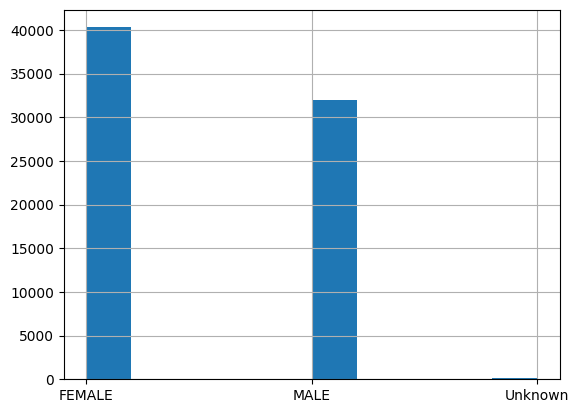

In [7]:
var = 'sex'
df[var] = df[var].replace(('.n:  No answer', '.i:  Inapplicable', '.s:  Skipped on Web', '.d:  Do not Know/Cannot Choose'), 'Unknown')
print(df[var].describe())
df[var] = pd.Categorical(df[var])
print('After Coercion: \n', df[var].unique(), '\n')
df[var].hist()

['White' 'Black' 'Other' '.i:  Inapplicable'] 

count     72390
unique        4
top       White
freq      57657
Name: race, dtype: object 

After Coercion: 
 ['White', 'Black', 'Other', '.i:  Inapplicable']
Categories (4, object): ['.i:  Inapplicable', 'Black', 'Other', 'White'] 



<Axes: >

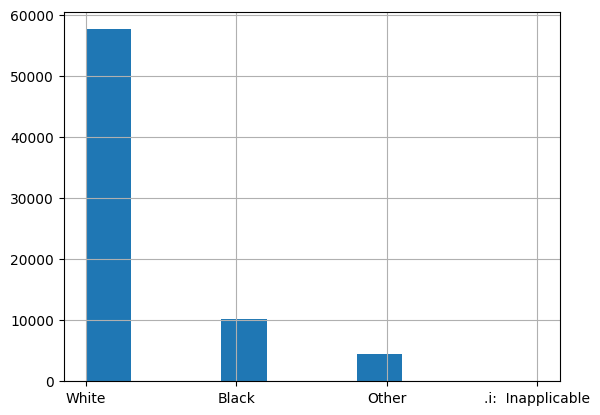

In [8]:
print(df['race'].unique(), '\n')
print(df['race'].describe(), '\n')
df['race'] = pd.Categorical(df['race'])
print('After Coercion: \n', df['race'].unique(), '\n')
df['race'].hist()

It's pretty weird that there's only two races listed here...

In [9]:
var = 'rincome'
print(df[var].describe(), '\n')
print(df[var].unique(), '\n')
df[var] = df[var].str.replace('$','')
df[var] = df[var].str.replace(' TO ','-')
df[var] = df[var].str.replace(' - ','-')
df[var] = df[var].str.replace('LT','Less than')
df[var] = df[var].replace(('.d:  Do not Know/Cannot Choose','.r:  Refused', '.n:  No answer', '.s:  Skipped on Web'),'Unknown')
df[var] = df[var].str.replace('.i:  Inapplicable', 'Inapplicable')
df[var] = df[var].str.replace('25000 OR MORE', 'Greater than 25000')
df[var] = pd.Categorical(df[var])
print(df[var].unique(), '\n')

count                 72390
unique                   17
top       .i:  Inapplicable
freq                  25799
Name: rincome, dtype: object 

['.i:  Inapplicable' '$1000 TO 2999' '$15000 - 19999' '$7000 TO 7999'
 '$8000 TO 9999' '$20000 - 24999' '$4000 TO 4999'
 '.d:  Do not Know/Cannot Choose' '$10000 - 14999' '$25000 OR MORE'
 '$3000 TO 3999' 'LT $1000' '$5000 TO 5999' '$6000 TO 6999' '.r:  Refused'
 '.n:  No answer' '.s:  Skipped on Web'] 

['Inapplicable', '1000-2999', '15000-19999', '7000-7999', '8000-9999', ..., 'Greater than 25000', '3000-3999', 'Less than 1000', '5000-5999', '6000-6999']
Length: 14
Categories (14, object): ['1000-2999', '10000-14999', '15000-19999', '20000-24999', ..., 'Greater than 25000', 'Inapplicable', 'Less than 1000', 'Unknown'] 



In [10]:
var = 'partyid'
print(df[var].describe(), '\n')
print(df[var].unique())
df[var] = df[var].replace(('Not very strong democrat','Strong democrat','Independent, close to democrat'), 'Left Leaning')
df[var] = df[var].replace(('Not very strong republican','Strong republican','Independent, close to republican'), 'Right Leaning')
df[var] = df[var].replace(('Independent (neither, no response)','Other party', '.n:  No answer','.d:  Do not Know/Cannot Choose'), 'Independent/Other')


count                        72390
unique                          10
top       Not very strong democrat
freq                         14286
Name: partyid, dtype: object 

['Independent, close to democrat' 'Not very strong democrat'
 'Independent (neither, no response)' 'Strong democrat'
 'Not very strong republican' 'Independent, close to republican'
 'Strong republican' 'Other party' '.n:  No answer'
 '.d:  Do not Know/Cannot Choose']


In [11]:
df['partyid'] = pd.Categorical(df['partyid'])
df['partyid'].unique()

['Left Leaning', 'Independent/Other', 'Right Leaning']
Categories (3, object): ['Independent/Other', 'Left Leaning', 'Right Leaning']

In [12]:
var = 'educ'
print(df[var].describe(), '\n')
print(df[var].unique(), '\n')
#df[var] = df[var].replace(())

count          72390
unique            23
top       12th grade
freq           21401
Name: educ, dtype: object 

['4 years of college' '10th grade' '12th grade' '5 years of college'
 '2 years of college' '1 year of college' '6th grade' '9th grade'
 '8th grade' '11th grade' '7th grade' '3 years of college'
 '8 or more years of college' '6 years of college' '3rd grade' '2nd grade'
 '4th grade' '5th grade' '7 years of college' '1st grade' '.n:  No answer'
 'No formal schooling' '.d:  Do not Know/Cannot Choose'] 



In [13]:
var = 'educ'
df[var] = df[var].str.replace('th grade','')
df[var] = df[var].str.replace('nd grade','')
df[var] = df[var].str.replace('st grade','')
df[var] = df[var].str.replace('rd grade','')
df[var] = df[var].str.replace('No formal schooling', '0')
df[var] = df[var].str.replace('.n:  No answer', 'Unknown')
df[var] = df[var].str.replace('.d:  Do not Know/Cannot Choose', 'Unknown')

In [14]:
var = 'educ'
def replace_years_of_college(value):
    if ' years of college' in value:
        num_years = int(value.split()[0])
        return str(12 + num_years)
    return value

df[var] = df[var].apply(replace_years_of_college)

In [15]:
var = 'educ'
def replace_year_of_college(value):
    if ' year of college' in value:
        num_years = int(value.split()[0])
        return str(12 + num_years)
    return value

df[var] = df[var].apply(replace_year_of_college)

In [16]:
var = 'educ'
print(df[var].value_counts())
print(df[var].unique())

educ
12         21401
16          9994
14          8208
13          5905
11          3942
15          3307
10          3010
18          2945
8           2786
17          2392
9           2172
20          1803
19          1112
7            896
6            866
5            410
4            326
3            268
Unknown      263
0            177
2            158
1             49
Name: count, dtype: int64
['16' '10' '12' '17' '14' '13' '6' '9' '8' '11' '7' '15' '20' '18' '3' '2'
 '4' '5' '19' '1' 'Unknown' '0']


count    72127.000000
mean        13.034633
std          3.182372
min          0.000000
25%         12.000000
50%         12.000000
75%         16.000000
max         20.000000
Name: educ, dtype: float64 



<Axes: >

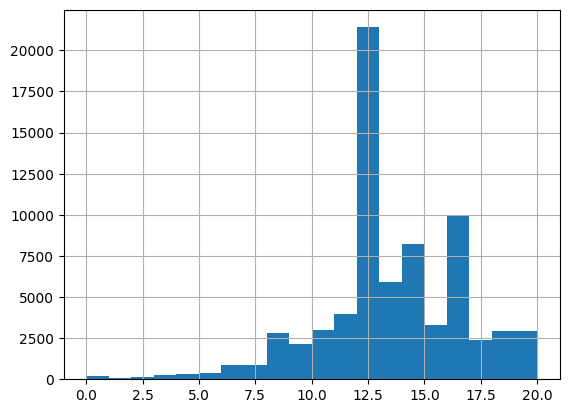

In [17]:
df['educ'] = pd.to_numeric(df['educ'], errors='coerce')
print(df['educ'].describe(), '\n')
df['educ'].hist(bins=20)

In [18]:
var = 'relig'
print(df[var].value_counts())

relig
Protestant                        40124
Catholic                          17242
Jewish                             1422
Other                              1224
Christian                          1000
.n:  No answer                      337
Buddhism                            272
Muslim/islam                        201
Orthodox-christian                  176
Inter-nondenominational             159
Hinduism                            158
.d:  Do not Know/Cannot Choose       59
Other eastern religions              44
.s:  Skipped on Web                  41
Native american                      36
Name: count, dtype: int64


In [19]:
var = 'relig'
df[var] = df[var].replace('.n:  No answer', 'Unknown')
df[var] = df[var].replace('.d:  Do not Know/Cannot Choose', 'Unknown')
df[var] = df[var].replace('.s:  Skipped on Web', 'Unknown')
df[var] = df[var].replace('Inter-nondenominational', 'Non-Denominational')
df[var] = pd.Categorical(df[var])

<Axes: >

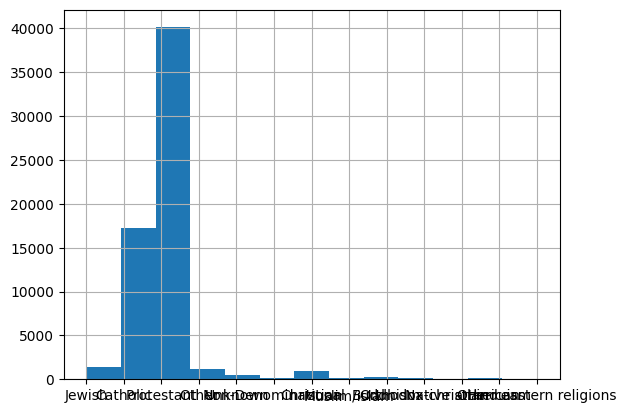

In [20]:
df['relig'].describe()
df['relig'].hist(bins=13)

['.i:  Inapplicable'
 "I have a husband or wife or steady partner, but we don't live in the same household"
 'I am married and living in the same household as my husband or wife'
 "I don't have a steady partner"
 'I have a steady partner, and we live in the same household'
 '.n:  No answer' '.d:  Do not Know/Cannot Choose' '.s:  Skipped on Web']


<Axes: >

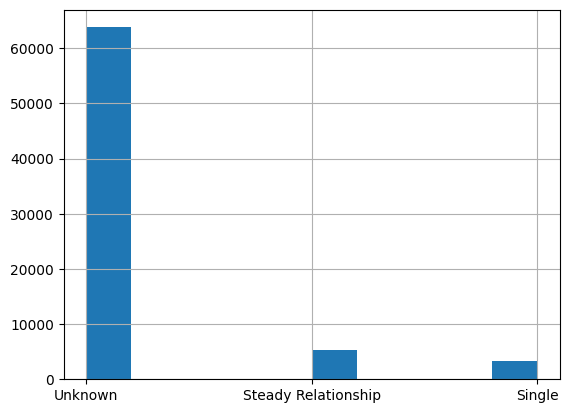

In [21]:
var = 'posslqy'
print(df[var].unique())
df[var] = df[var].str.replace('I don\'t have a steady partner','Single')
df[var] = df[var].str.replace('.n:  No answer','Unknown')
df[var] = df[var].str.replace('.d:  Do not Know/Cannot Choose','Unknown')
df[var] = df[var].str.replace('.s:  Skipped on Web','Unknown')
df[var] = df[var].str.replace('.i:  Inapplicable','Unknown')
df[var] = df[var].str.replace('I have a husband or wife or steady partner, but we don\'t live in the same household','Steady Relationship')
df[var] = df[var].str.replace('I am married and living in the same household as my husband or wife','Steady Relationship')
df[var] = df[var].str.replace('I have a steady partner, and we live in the same household','Steady Relationship')
df[var] = pd.Categorical(df[var])
df[var].hist()

In [22]:
print(df.dtypes)

year           int64
id_            int64
age          float64
educ         float64
sex         category
race        category
rincome     category
partyid     category
relig       category
abdefect      object
abrape        object
abany         object
posslqy     category
sexornt       object
ballot        object
age_nan         bool
dtype: object


In [23]:
var = 'abdefect'
df[var] = df[var].str.replace('.s:  Skipped on Web', 'No answer')
df[var] = df[var].str.replace('.n:  No answer', 'No answer')
df[var] = df[var].str.replace('.i:  Inapplicable', 'Inapplicable')
df[var] = df[var].str.replace('.d:  Do not Know/Cannot Choose', 'Cannot Choose')
df[var] = pd.Categorical(df[var])
print(df[var].unique())

['YES', 'NO', 'Cannot Choose', 'No answer', 'Inapplicable']
Categories (5, object): ['Cannot Choose', 'Inapplicable', 'NO', 'No answer', 'YES']


In [24]:
var = 'abrape'
print(df[var].unique())
df[var] = df[var].str.replace('.s:  Skipped on Web', 'No answer')
df[var] = df[var].str.replace('.n:  No answer', 'No answer')
df[var] = df[var].str.replace('.i:  Inapplicable', 'Inapplicable')
df[var] = df[var].str.replace('.d:  Do not Know/Cannot Choose', 'Cannot Choose')
df[var] = pd.Categorical(df[var])
print(df[var].unique())

['YES' '.i:  Inapplicable' '.n:  No answer' 'NO'
 '.d:  Do not Know/Cannot Choose' '.s:  Skipped on Web']
['YES', 'Inapplicable', 'No answer', 'NO', 'Cannot Choose']
Categories (5, object): ['Cannot Choose', 'Inapplicable', 'NO', 'No answer', 'YES']


In [25]:
var = 'abany'
print(df[var].unique())
df[var] = df[var].str.replace('.s:  Skipped on Web', 'No answer')
df[var] = df[var].str.replace('.n:  No answer', 'No answer')
df[var] = df[var].str.replace('.i:  Inapplicable', 'Inapplicable')
df[var] = df[var].str.replace('.d:  Do not Know/Cannot Choose', 'Cannot Choose')
df[var] = pd.Categorical(df[var])
print(df[var].unique())

['.i:  Inapplicable' 'YES' 'NO' '.n:  No answer'
 '.d:  Do not Know/Cannot Choose' '.s:  Skipped on Web']
['Inapplicable', 'YES', 'NO', 'No answer', 'Cannot Choose']
Categories (5, object): ['Cannot Choose', 'Inapplicable', 'NO', 'No answer', 'YES']


In [26]:
var = 'sexornt'
print(df[var].unique())
df[var] = df[var].str.replace('Heterosexual or straight','Heterosexual')
df[var] = df[var].str.replace('Gay, lesbian, or homosexual','Homosexual')
df[var] = df[var].str.replace('Gay, lesbian, or homosexual','Homosexual')
df[var] = df[var].str.replace('.s:  Skipped on Web', 'No answer')
df[var] = df[var].str.replace('.n:  No answer', 'No answer')
df[var] = df[var].str.replace('.i:  Inapplicable', 'Inapplicable')
df[var] = df[var].str.replace('.d:  Do not Know/Cannot Choose', 'Cannot Choose')
df[var] = pd.Categorical(df[var])
print(df[var].unique())

['.i:  Inapplicable' 'Heterosexual or straight'
 '.d:  Do not Know/Cannot Choose' '.n:  No answer'
 'Gay, lesbian, or homosexual' 'Bisexual' '.s:  Skipped on Web']
['Inapplicable', 'Heterosexual', 'Cannot Choose', 'No answer', 'Homosexual', 'Bisexual']
Categories (6, object): ['Bisexual', 'Cannot Choose', 'Heterosexual', 'Homosexual', 'Inapplicable', 'No answer']


In [27]:
df['ballot'].unique()

array(['.i:  Inapplicable', 'Ballot b', 'Ballot c', 'Ballot a',
       'Ballot d'], dtype=object)

## Unique Values and Datatypes Post-Cleaning

In [28]:
for column in df.columns:
    print(f"Unique values in {column}:")
    print(df[column].unique())
    print(f"Dtype: {df[column].dtype}")
    print("\n")

Unique values in year:
[1972 1973 1974 1975 1976 1977 1978 1980 1982 1983 1984 1985 1986 1987
 1988 1989 1990 1991 1993 1994 1996 1998 2000 2002 2004 2006 2008 2010
 2012 2014 2016 2018 2021 2022]
Dtype: int64


Unique values in id_:
[   1    2    3 ... 4508 4509 4510]
Dtype: int64


Unique values in age:
[23. 70. 48. 27. 61. 26. 28. 21. 30. 56. 54. 49. 41. 24. 62. 46. 57. 58.
 71. 53. 42. 20. 25. 78. 35. 51. 76. 39. 64. 50. 40. 43. 37. 22. 31. 52.
 47. 45. 68. 63. 19. 55. 44. 34. 36. 74. 69. 29. 67. 75. 38. 73. 84. 82.
 72. 59. 33. 81. 65. 32. nan 60. 80. 66. 77. 18. 79. 83. 85. 88. 87. 86.]
Dtype: float64


Unique values in educ:
[16. 10. 12. 17. 14. 13.  6.  9.  8. 11.  7. 15. 20. 18.  3.  2.  4.  5.
 19.  1. nan  0.]
Dtype: float64


Unique values in sex:
['FEMALE', 'MALE', 'Unknown']
Categories (3, object): ['FEMALE', 'MALE', 'Unknown']
Dtype: category


Unique values in race:
['White', 'Black', 'Other', '.i:  Inapplicable']
Categories (4, object): ['.i:  Inapplicable', 'Black', '

In [29]:
for column in df.columns:
    unique_count = df[column].nunique()
    print(f"Number of unique values in {column} (dtype: {df[column].dtype}): {unique_count}")

Number of unique values in year (dtype: int64): 34
Number of unique values in id_ (dtype: int64): 4510
Number of unique values in age (dtype: float64): 71
Number of unique values in educ (dtype: float64): 21
Number of unique values in sex (dtype: category): 3
Number of unique values in race (dtype: category): 4
Number of unique values in rincome (dtype: category): 14
Number of unique values in partyid (dtype: category): 3
Number of unique values in relig (dtype: category): 13
Number of unique values in abdefect (dtype: category): 5
Number of unique values in abrape (dtype: category): 5
Number of unique values in abany (dtype: category): 5
Number of unique values in posslqy (dtype: category): 3
Number of unique values in sexornt (dtype: category): 6
Number of unique values in ballot (dtype: object): 5
Number of unique values in age_nan (dtype: bool): 2


# Plotting and Visualization

## Value Counts to show Distribution for Variables

<Axes: title={'center': 'Distribution of Age'}, xlabel='Age', ylabel='Frequency'>

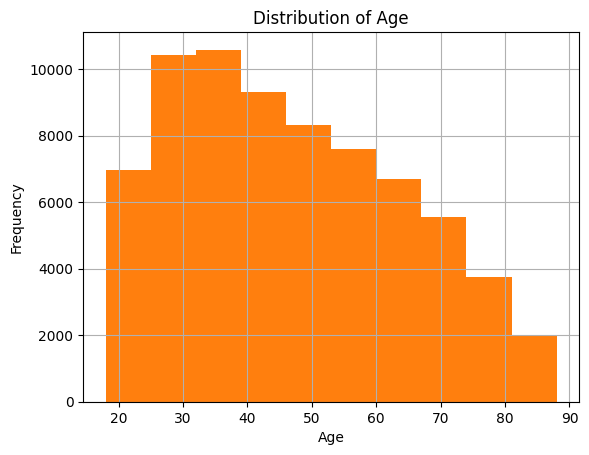

In [30]:

var = 'age'
df[var].hist()
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
df[var].hist()

<Axes: title={'center': 'Distribution of Educ'}, xlabel='Years of Educ', ylabel='Frequency'>

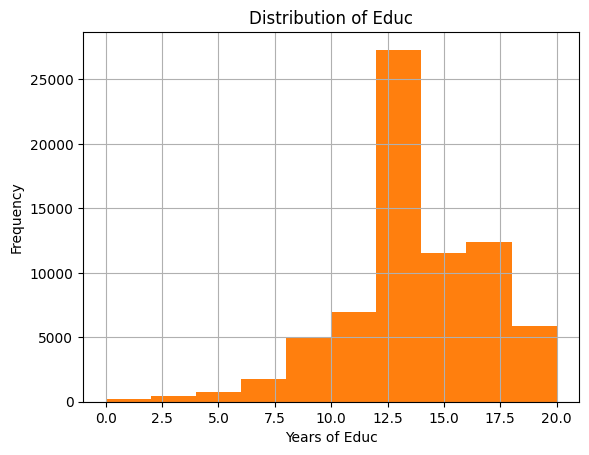

In [31]:
var = 'educ'
df[var].hist()
plt.xlabel('Years of ' + var.capitalize())
plt.ylabel('Frequency')
plt.title('Distribution of ' + var.capitalize())
df[var].hist()

<Axes: title={'center': 'Distribution of Sex'}, xlabel='Sex', ylabel='Frequency'>

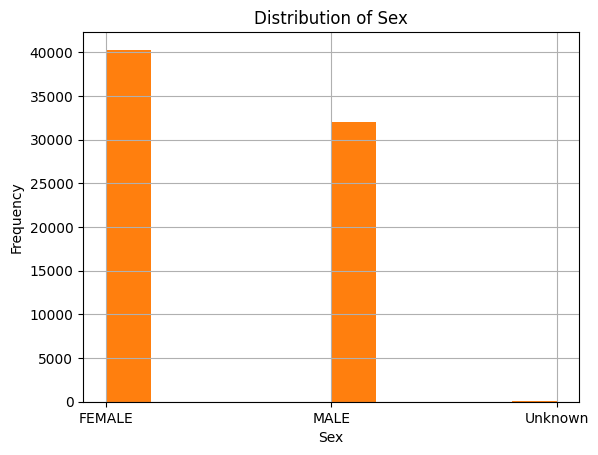

In [32]:
var = 'sex'
df[var].hist()
plt.xlabel(var.capitalize())
plt.ylabel('Frequency')
plt.title('Distribution of ' + var.capitalize())
df[var].hist()

<Axes: title={'center': 'Distribution of Race'}, xlabel='Race', ylabel='Frequency'>

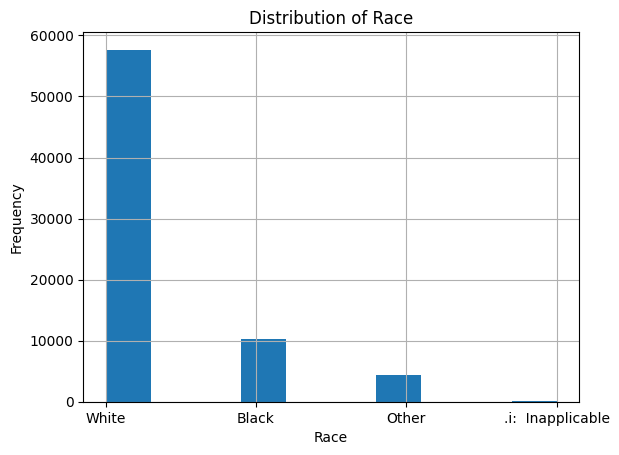

In [33]:
var = 'race'
plt.xlabel(var.capitalize())
plt.ylabel('Frequency')
plt.title('Distribution of ' + var.capitalize())
df[var].hist()

In [34]:
df['rincome'].value_counts()

rincome
Inapplicable          25799
Greater than 25000    18249
10000-14999            5138
Unknown                4258
20000-24999            4125
15000-19999            4048
1000-2999              1952
8000-9999              1840
Less than 1000         1365
3000-3999              1300
5000-5999              1149
4000-4999              1099
6000-6999              1037
7000-7999              1031
Name: count, dtype: int64

<Axes: title={'center': 'Distribution of Income'}, xlabel='rincome', ylabel='Frequency'>

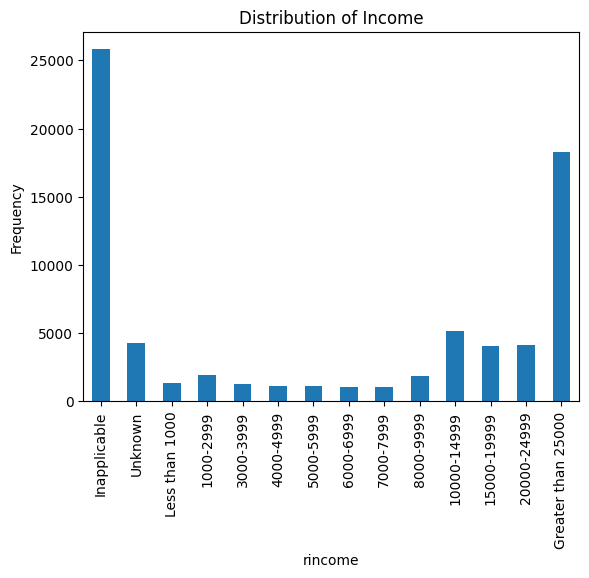

In [35]:
# Define the order of categories
category_order = ['Inapplicable','Unknown', 'Less than 1000', '1000-2999', '3000-3999', '4000-4999', 
                  '5000-5999', '6000-6999', '7000-7999', '8000-9999', 
                  '10000-14999', '15000-19999', '20000-24999', 'Greater than 25000']

# Convert the column to categorical with the specified order
df['rincome'] = pd.Categorical(df['rincome'], categories=category_order, ordered=True)

# Plot the histogram
var = 'rincome'
plt.xticks(rotation=45)
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Distribution of Income')
df[var].value_counts(sort=False).plot(kind='bar')

<Axes: title={'center': 'Distribution of Political Party Leaning'}, xlabel='Political Party Leaning', ylabel='Frequency'>

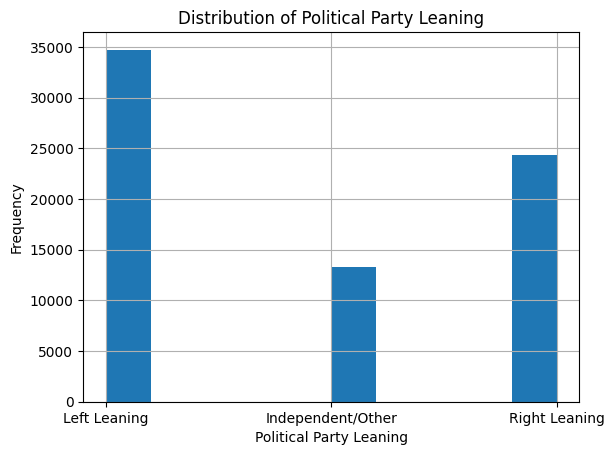

In [36]:
var = 'partyid'
plt.xlabel('Political Party Leaning')
plt.ylabel('Frequency')
plt.title('Distribution of Political Party Leaning')
df[var].hist()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'Protestant'),
  Text(1, 0, 'Catholic'),
  Text(2, 0, 'Jewish'),
  Text(3, 0, 'Other'),
  Text(4, 0, 'Christian'),
  Text(5, 0, 'Unknown'),
  Text(6, 0, 'Buddhism'),
  Text(7, 0, 'Muslim/islam'),
  Text(8, 0, 'Orthodox-christian'),
  Text(9, 0, 'Non-Denominational'),
  Text(10, 0, 'Hinduism'),
  Text(11, 0, 'Other eastern religions'),
  Text(12, 0, 'Native american')])

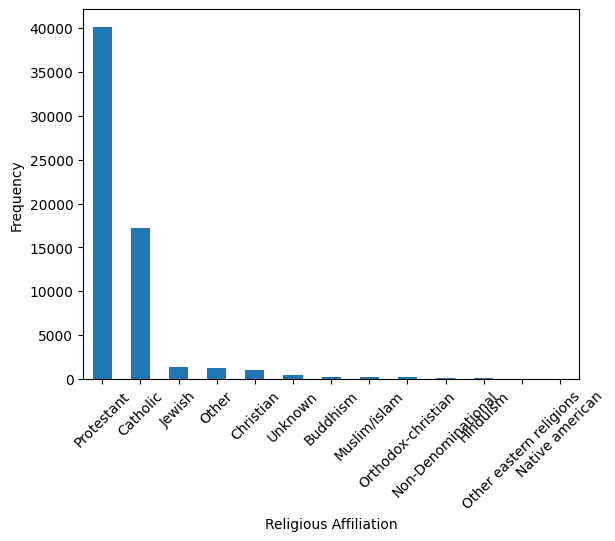

In [37]:
var = 'relig'
plt.xlabel('Religious Affiliation')
plt.ylabel('Frequency')
df[var].value_counts().plot(kind='bar')
plt.xlabel('Religious Affiliation')
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Inapplicable'),
  Text(1, 0, 'Heterosexual'),
  Text(2, 0, 'Bisexual'),
  Text(3, 0, 'Homosexual'),
  Text(4, 0, 'No answer'),
  Text(5, 0, 'Cannot Choose')])

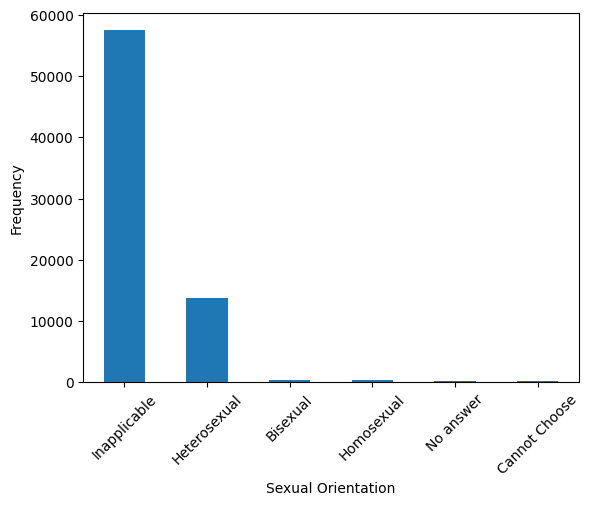

In [38]:
var = 'sexornt'
plt.ylabel('Frequency')
df[var].value_counts().plot(kind='bar')
plt.xlabel('Sexual Orientation')
plt.xticks(rotation=45)

(array([0, 1, 2]),
 [Text(0, 0, 'Unknown'),
  Text(1, 0, 'Steady Relationship'),
  Text(2, 0, 'Single')])

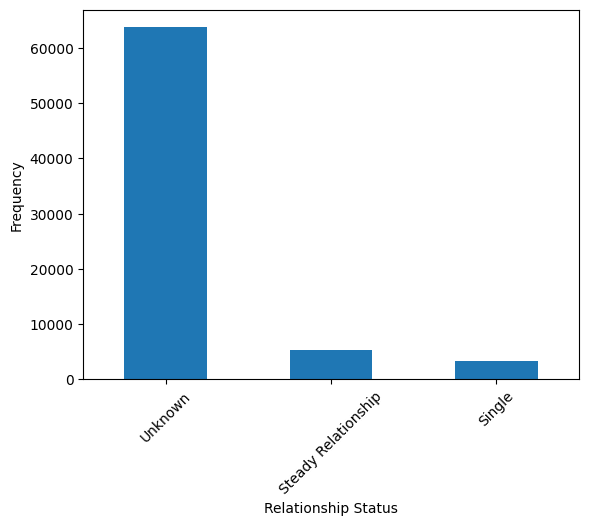

In [39]:
var = 'posslqy'
plt.xlabel('Relationship Status')
plt.ylabel('Frequency')
df[var].value_counts().plot(kind='bar')
plt.xlabel('Relationship Status')
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'YES'),
  Text(1, 0, 'Inapplicable'),
  Text(2, 0, 'NO'),
  Text(3, 0, 'Cannot Choose'),
  Text(4, 0, 'No answer')])

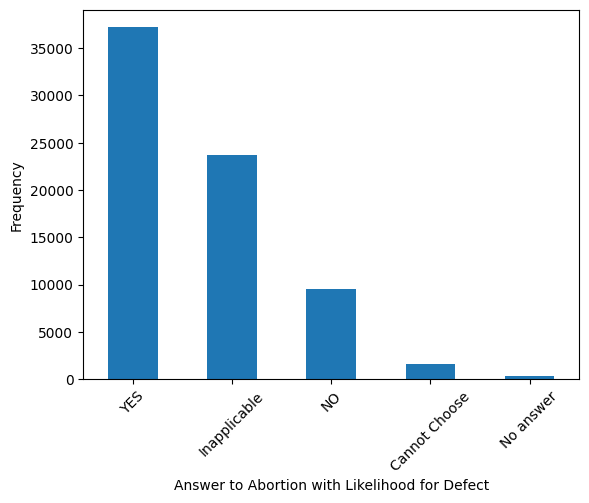

In [40]:
var = 'abdefect'
plt.ylabel('Frequency')
df[var].value_counts().plot(kind='bar')
plt.xlabel('Answer to Abortion with Likelihood for Defect')
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'YES'),
  Text(1, 0, 'Inapplicable'),
  Text(2, 0, 'NO'),
  Text(3, 0, 'Cannot Choose'),
  Text(4, 0, 'No answer')])

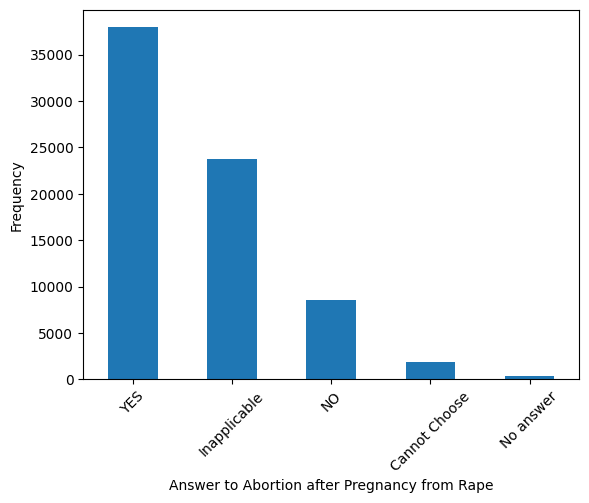

In [41]:
var = 'abrape'
plt.ylabel('Frequency')
df[var].value_counts().plot(kind='bar')
plt.xlabel('Answer to Abortion after Pregnancy from Rape')
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Inapplicable'),
  Text(1, 0, 'NO'),
  Text(2, 0, 'YES'),
  Text(3, 0, 'Cannot Choose'),
  Text(4, 0, 'No answer')])

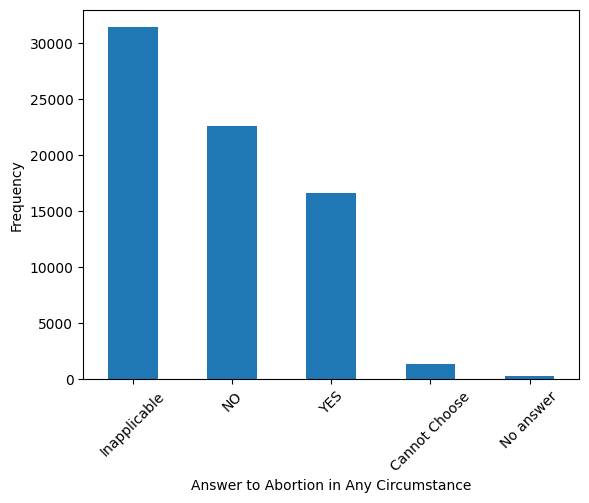

In [42]:
var = 'abany'
plt.ylabel('Frequency')
df[var].value_counts().plot(kind='bar')
plt.xlabel('Answer to Abortion in Any Circumstance')
plt.xticks(rotation=45)

## Numeric Summaries

In [43]:
for column in df.columns:
    unique_count = df[column].nunique()
    print(f"Number of unique values in {column} (dtype: {df[column].dtype}): {unique_count}")

Number of unique values in year (dtype: int64): 34
Number of unique values in id_ (dtype: int64): 4510
Number of unique values in age (dtype: float64): 71
Number of unique values in educ (dtype: float64): 21
Number of unique values in sex (dtype: category): 3
Number of unique values in race (dtype: category): 4
Number of unique values in rincome (dtype: category): 14
Number of unique values in partyid (dtype: category): 3
Number of unique values in relig (dtype: category): 13
Number of unique values in abdefect (dtype: category): 5
Number of unique values in abrape (dtype: category): 5
Number of unique values in abany (dtype: category): 5
Number of unique values in posslqy (dtype: category): 3
Number of unique values in sexornt (dtype: category): 6
Number of unique values in ballot (dtype: object): 5
Number of unique values in age_nan (dtype: bool): 2


In [44]:
descr = df['age'].describe() # Describe age and save as an object
print(descr,'\n')

# Computing the Variance:
std = descr[2] # Accessing the standard deviation from the description object
var = std**2
print('Variance: ', var,'\n')

# Computing the IQR:
thirdQ = descr[6] # Getting the 75% percentile
firstQ = descr[4] # Getting the 25% percentile
IQR = thirdQ - firstQ # Computing the IQR
print('IQR: ', IQR)

count    71212.000000
mean        46.312209
std         17.353604
min         18.000000
25%         32.000000
50%         44.000000
75%         60.000000
max         88.000000
Name: age, dtype: float64 

Variance:  301.1475708223278 

IQR:  28.0


C:\Users\alexl\AppData\Local\Temp\ipykernel_26128\3490558612.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  std = descr[2] # Accessing the standard deviation from the description object
C:\Users\alexl\AppData\Local\Temp\ipykernel_26128\3490558612.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  thirdQ = descr[6] # Getting the 75% percentile
C:\Users\alexl\AppData\Local\Temp\ipykernel_26128\3490558612.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by po

In [45]:
descr = df['educ'].describe() # Describe age and save as an object
print(descr,'\n')

# Computing the Variance:
std = descr[2] # Accessing the standard deviation from the description object
var = std**2
print('Variance: ', var,'\n')

# Computing the IQR:
thirdQ = descr[6] # Getting the 75% percentile
firstQ = descr[4] # Getting the 25% percentile
IQR = thirdQ - firstQ # Computing the IQR
print('IQR: ', IQR)

count    72127.000000
mean        13.034633
std          3.182372
min          0.000000
25%         12.000000
50%         12.000000
75%         16.000000
max         20.000000
Name: educ, dtype: float64 

Variance:  10.127491970705078 

IQR:  4.0


C:\Users\alexl\AppData\Local\Temp\ipykernel_26128\3753616953.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  std = descr[2] # Accessing the standard deviation from the description object
C:\Users\alexl\AppData\Local\Temp\ipykernel_26128\3753616953.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  thirdQ = descr[6] # Getting the 75% percentile
C:\Users\alexl\AppData\Local\Temp\ipykernel_26128\3753616953.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by po

In [46]:
descr = df['year'].describe() # Describe age and save as an object
print(descr,'\n')

# Computing the Variance:
std = descr[2] # Accessing the standard deviation from the description object
var = std**2
print('Variance: ', var,'\n')

# Computing the IQR:
thirdQ = descr[6] # Getting the 75% percentile
firstQ = descr[4] # Getting the 25% percentile
IQR = thirdQ - firstQ # Computing the IQR
print('IQR: ', IQR)

count    72390.000000
mean      1997.715541
std         15.109995
min       1972.000000
25%       1985.000000
50%       1998.000000
75%       2010.000000
max       2022.000000
Name: year, dtype: float64 

Variance:  228.31195922829264 

IQR:  25.0


C:\Users\alexl\AppData\Local\Temp\ipykernel_26128\3411656970.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  std = descr[2] # Accessing the standard deviation from the description object
C:\Users\alexl\AppData\Local\Temp\ipykernel_26128\3411656970.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  thirdQ = descr[6] # Getting the 75% percentile
C:\Users\alexl\AppData\Local\Temp\ipykernel_26128\3411656970.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by po

In [47]:
for column in df.columns:
    unique_count = df[column].nunique()
    print(f"Number of unique values in {column} (dtype: {df[column].dtype}): {unique_count}")

Number of unique values in year (dtype: int64): 34
Number of unique values in id_ (dtype: int64): 4510
Number of unique values in age (dtype: float64): 71
Number of unique values in educ (dtype: float64): 21
Number of unique values in sex (dtype: category): 3
Number of unique values in race (dtype: category): 4
Number of unique values in rincome (dtype: category): 14
Number of unique values in partyid (dtype: category): 3
Number of unique values in relig (dtype: category): 13
Number of unique values in abdefect (dtype: category): 5
Number of unique values in abrape (dtype: category): 5
Number of unique values in abany (dtype: category): 5
Number of unique values in posslqy (dtype: category): 3
Number of unique values in sexornt (dtype: category): 6
Number of unique values in ballot (dtype: object): 5
Number of unique values in age_nan (dtype: bool): 2


## Visualizations

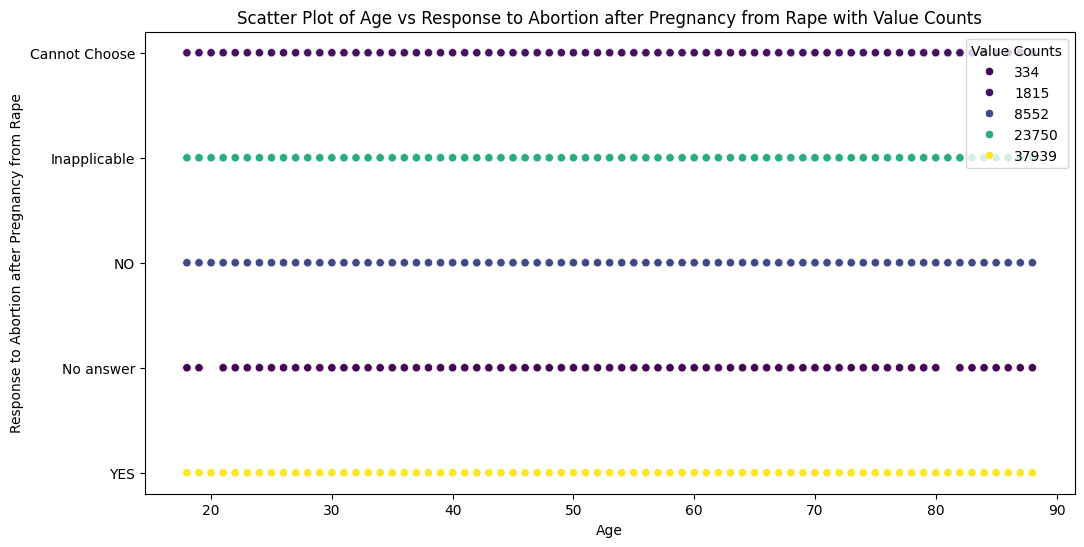

In [48]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='age', y='abrape', data=df, hue=df['abrape'].value_counts().reindex(df['abrape']).values, palette='viridis')
plt.xlabel('Age')
plt.ylabel('Response to Abortion after Pregnancy from Rape')
plt.title('Scatter Plot of Age vs Response to Abortion after Pregnancy from Rape with Value Counts')
plt.legend(title='Value Counts', loc='upper right')
plt.show()

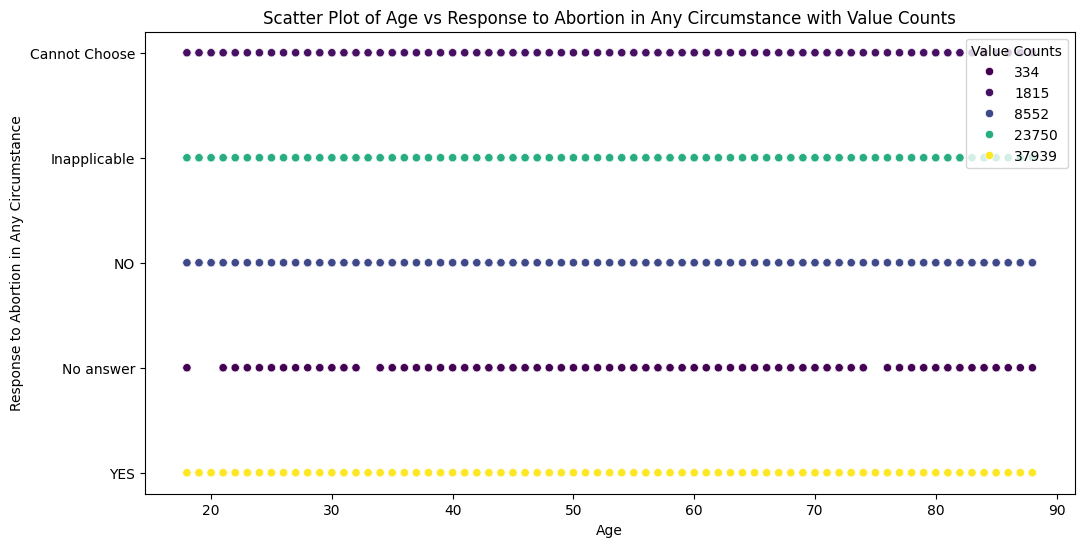

In [49]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='age', y='abany', data=df, hue=df['abrape'].value_counts().reindex(df['abany']).values, palette='viridis')
plt.xlabel('Age')
plt.ylabel('Response to Abortion in Any Circumstance')
plt.title('Scatter Plot of Age vs Response to Abortion in Any Circumstance with Value Counts')
plt.legend(title='Value Counts', loc='upper right')
plt.show()

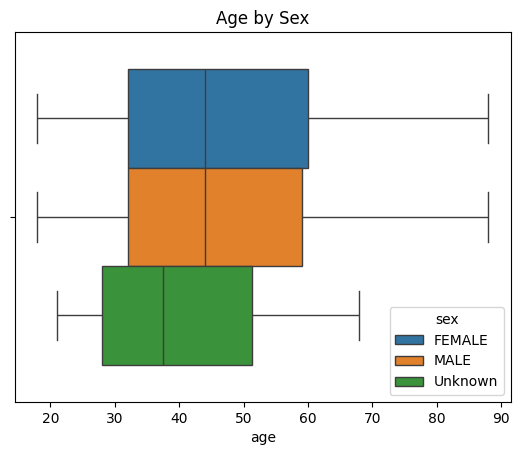

In [53]:
sns.boxplot(data=df, x = 'age', hue = 'sex').set(title='Age by Sex')
plt.show()

In [54]:
for column in df.columns:
    unique_count = df[column].nunique()
    print(f"Number of unique values in {column} (dtype: {df[column].dtype}): {unique_count}")

Number of unique values in year (dtype: int64): 34
Number of unique values in id_ (dtype: int64): 4510
Number of unique values in age (dtype: float64): 71
Number of unique values in educ (dtype: float64): 21
Number of unique values in sex (dtype: category): 3
Number of unique values in race (dtype: category): 4
Number of unique values in rincome (dtype: category): 14
Number of unique values in partyid (dtype: category): 3
Number of unique values in relig (dtype: category): 13
Number of unique values in abdefect (dtype: category): 5
Number of unique values in abrape (dtype: category): 5
Number of unique values in abany (dtype: category): 5
Number of unique values in posslqy (dtype: category): 3
Number of unique values in sexornt (dtype: category): 6
Number of unique values in ballot (dtype: object): 5
Number of unique values in age_nan (dtype: bool): 2


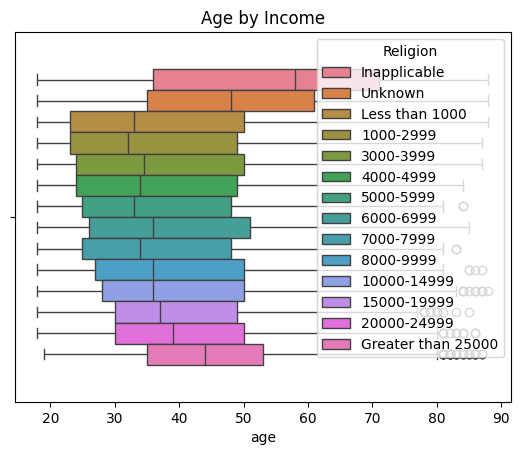

In [65]:
sns.boxplot(data=df, x = 'age', hue = 'rincome').set(title='Age by Income')
plt.legend(title='Religion', loc='upper right')
plt.show()

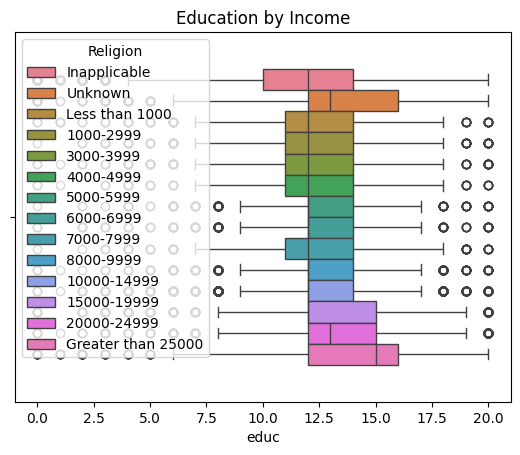

In [64]:
sns.boxplot(data=df, x = 'educ', hue = 'rincome').set(title='Education by Income')
plt.legend(title='Religion', loc='upper left')
plt.show()

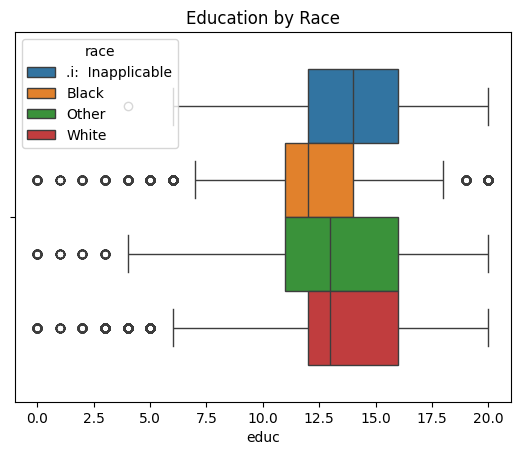

In [61]:
sns.boxplot(data=df, x = 'educ', hue = 'race').set(title='Education by Race')
plt.show()

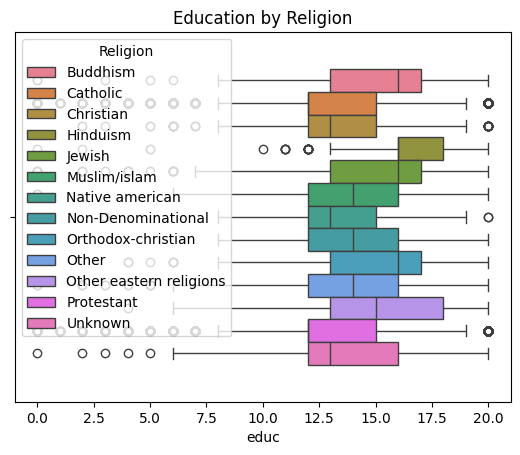

In [63]:
sns.boxplot(data=df, x = 'educ', hue = 'relig').set(title='Education by Religion')
plt.legend(title='Religion', loc='upper left')
plt.show()

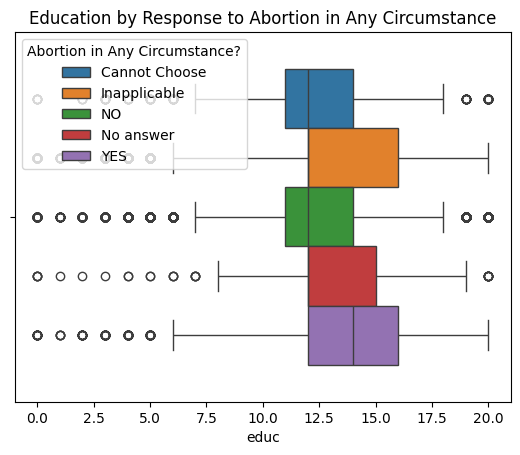

In [78]:
sns.boxplot(data=df, x = 'educ', hue = 'abany').set(title='Education by Response to Abortion in Any Circumstance')
plt.legend(title='Abortion in Any Circumstance?', loc='upper left')
plt.show()

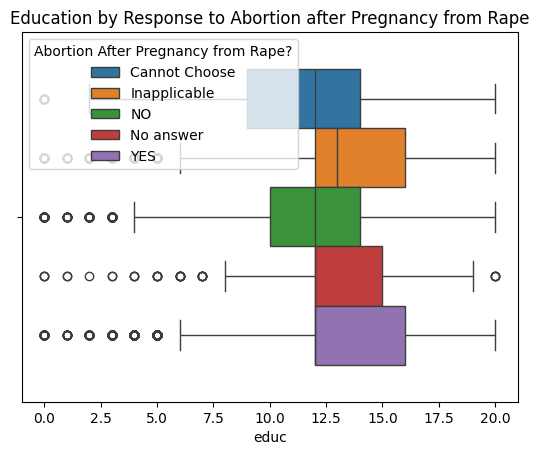

In [68]:
sns.boxplot(data=df, x = 'educ', hue = 'abrape').set(title='Education by Response to Abortion after Pregnancy from Rape')
plt.legend(title='Abortion After Pregnancy from Rape?', loc='upper left')
plt.show()

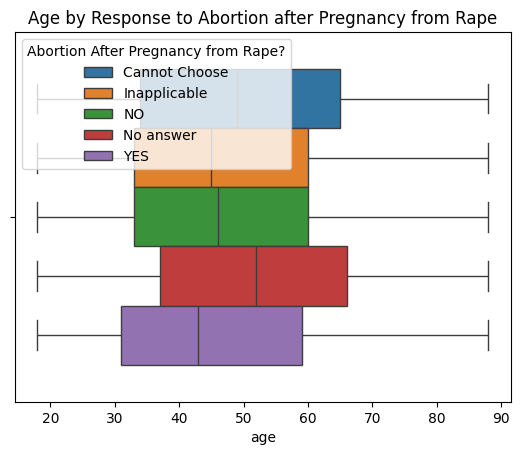

In [76]:
sns.boxplot(data=df, x = 'age', hue = 'abrape').set(title='Age by Response to Abortion after Pregnancy from Rape')
plt.legend(title='Abortion After Pregnancy from Rape?', loc='upper left')
plt.show()

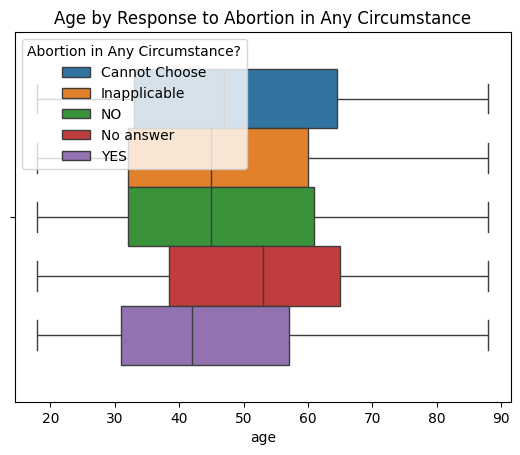

In [77]:
sns.boxplot(data=df, x = 'age', hue = 'abany').set(title='Age by Response to Abortion in Any Circumstance')
plt.legend(title='Abortion in Any Circumstance?', loc='upper left')
plt.show()

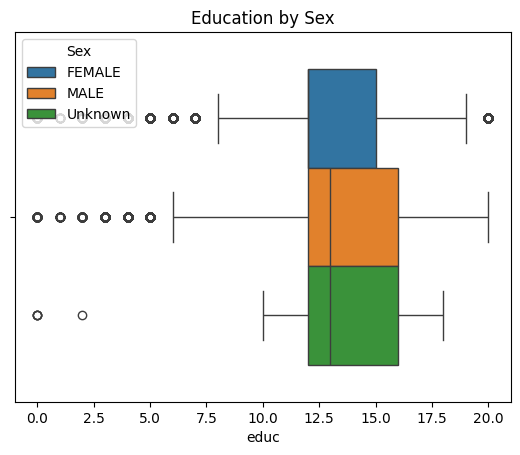

In [75]:
sns.boxplot(data=df, x = 'educ', hue = 'sex').set(title='Education by Sex')
plt.legend(title='Sex', loc='upper left')
plt.show()

In [71]:
intersection_table = pd.crosstab(df['sex'], df['abrape'])
print(intersection_table)

abrape   Cannot Choose  Inapplicable    NO  No answer    YES
sex                                                         
FEMALE            1035         13271  5075        190  20730
MALE               780         10402  3474        143  17178
Unknown              0            77     3          1     31


In [74]:
intersection_table = pd.crosstab(df['sex'], df['abany'])
print(intersection_table)

# Calculate proportions
proportions = intersection_table.div(intersection_table.sum(axis=1), axis=0)
print(proportions)

abany    Cannot Choose  Inapplicable     NO  No answer   YES
sex                                                         
FEMALE             756         17379  12847        175  9144
MALE               613         13984   9741        146  7493
Unknown              0            77     18          2    15
abany    Cannot Choose  Inapplicable        NO  No answer       YES
sex                                                                
FEMALE        0.018759      0.431230  0.318776   0.004342  0.226893
MALE          0.019170      0.437314  0.304625   0.004566  0.234325
Unknown       0.000000      0.687500  0.160714   0.017857  0.133929
